In [1]:
import re
import pandas as pd

In [2]:
df = open('whatsapp.txt','r',encoding='utf-8')

In [3]:
data = df.read()

In [4]:
pattern = r'\d{2}/\d{2}/\d{4},\s\d{1,2}:\d{2}\s*(?:am|pm)\s-\s'


In [5]:
messages = [m for m in re.split(pattern, data) if m.strip()]


In [6]:
data = data.replace('\u202f', ' ')


In [7]:
dates = re.findall(pattern,data)
dates

['31/05/2025, 6:05 pm - ',
 '29/05/2025, 7:35 pm - ',
 '31/05/2025, 6:07 pm - ',
 '31/05/2025, 6:07 pm - ',
 '31/05/2025, 6:07 pm - ',
 '31/05/2025, 6:07 pm - ',
 '31/05/2025, 6:07 pm - ',
 '31/05/2025, 6:07 pm - ',
 '31/05/2025, 6:07 pm - ',
 '31/05/2025, 6:07 pm - ',
 '31/05/2025, 6:08 pm - ',
 '31/05/2025, 6:08 pm - ',
 '31/05/2025, 6:08 pm - ',
 '31/05/2025, 6:08 pm - ',
 '31/05/2025, 6:09 pm - ',
 '31/05/2025, 6:09 pm - ',
 '31/05/2025, 6:10 pm - ',
 '31/05/2025, 6:10 pm - ',
 '31/05/2025, 6:10 pm - ',
 '31/05/2025, 6:10 pm - ',
 '31/05/2025, 6:10 pm - ',
 '31/05/2025, 6:11 pm - ',
 '31/05/2025, 6:11 pm - ',
 '31/05/2025, 6:11 pm - ',
 '31/05/2025, 6:11 pm - ',
 '31/05/2025, 6:11 pm - ',
 '31/05/2025, 6:11 pm - ',
 '31/05/2025, 6:12 pm - ',
 '31/05/2025, 6:12 pm - ',
 '31/05/2025, 6:12 pm - ',
 '31/05/2025, 6:12 pm - ',
 '31/05/2025, 6:12 pm - ',
 '31/05/2025, 6:17 pm - ',
 '31/05/2025, 6:17 pm - ',
 '31/05/2025, 6:17 pm - ',
 '31/05/2025, 7:14 pm - ',
 '31/05/2025, 8:55 pm - ',
 

In [8]:
print(len(messages), len(dates))

4337 4337


In [9]:
df = pd.DataFrame({'user_message':messages, 'message_date':dates})
#Convert message_date type
df['message_date'] = (
    df['message_date']
    .str.replace('\u202f', ' ', regex=False)
    .str.replace(r'\s-\s$', '', regex=True)
)

df['message_date'] = pd.to_datetime(df['message_date'],format='%d/%m/%Y, %I:%M %p')

df.rename(columns={'message_date':'date'},inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2025-05-31 18:05:00
1,Soham Sawant: Waiting for this message\n,2025-05-29 19:35:00
2,Rosesh Chauhan: Mujhe sab message send kar na\n,2025-05-31 18:07:00
3,Rosesh Chauhan: Cdac ke vagere\n,2025-05-31 18:07:00
4,Rosesh Chauhan: Imp honge jo\n,2025-05-31 18:07:00


In [10]:
df.shape

(4337, 2)

In [11]:
users = []
messages_list = []

for msg in df['user_message']:
    entry = re.split(r'^([^:]+):\s', msg, maxsplit=1)

    if len(entry) > 1:
        users.append(entry[1])
        messages_list.append(entry[2])
    else:
        users.append('group_notification')
        messages_list.append(entry[0])


In [12]:
df['user'] = users
df['message'] = messages_list
df.drop(columns=['user_message'], inplace=True)


In [13]:
df.head()

,date,user,message
0,2025-05-31 18:05:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2025-05-29 19:35:00,Soham Sawant,Waiting for this message\n
2,2025-05-31 18:07:00,Rosesh Chauhan,Mujhe sab message send kar na\n
3,2025-05-31 18:07:00,Rosesh Chauhan,Cdac ke vagere\n
4,2025-05-31 18:07:00,Rosesh Chauhan,Imp honge jo\n


In [14]:
df['year'] = df['date'].dt.year

In [15]:
df.head()

,date,user,message,year
0,2025-05-31 18:05:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025
1,2025-05-29 19:35:00,Soham Sawant,Waiting for this message\n,2025
2,2025-05-31 18:07:00,Rosesh Chauhan,Mujhe sab message send kar na\n,2025
3,2025-05-31 18:07:00,Rosesh Chauhan,Cdac ke vagere\n,2025
4,2025-05-31 18:07:00,Rosesh Chauhan,Imp honge jo\n,2025


In [16]:
df['month'] = df['date'].dt.month_name()

In [17]:
df.head()

,date,user,message,year,month
0,2025-05-31 18:05:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,May
1,2025-05-29 19:35:00,Soham Sawant,Waiting for this message\n,2025,May
2,2025-05-31 18:07:00,Rosesh Chauhan,Mujhe sab message send kar na\n,2025,May
3,2025-05-31 18:07:00,Rosesh Chauhan,Cdac ke vagere\n,2025,May
4,2025-05-31 18:07:00,Rosesh Chauhan,Imp honge jo\n,2025,May


In [18]:
df['day'] = df['date'].dt.day

In [19]:
df['hour'] = df['date'].dt.hour

In [20]:
df['minute'] = df['date'].dt.minute

In [21]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2025-05-31 18:05:00,group_notification,Messages and calls are end-to-end encrypted. O...,2025,May,31,18,5
1,2025-05-29 19:35:00,Soham Sawant,Waiting for this message\n,2025,May,29,19,35
2,2025-05-31 18:07:00,Rosesh Chauhan,Mujhe sab message send kar na\n,2025,May,31,18,7
3,2025-05-31 18:07:00,Rosesh Chauhan,Cdac ke vagere\n,2025,May,31,18,7
4,2025-05-31 18:07:00,Rosesh Chauhan,Imp honge jo\n,2025,May,31,18,7


In [22]:
words = []
for message in df['message']:
  words.extend(message.split())

In [23]:
len(words)

18583

In [24]:
from urlextract import URLExtract
extractor = URLExtract()

In [26]:
links = []

for message in df['message']:
  links.extend(extractor.find_urls(message))


In [28]:
len(links)

27

In [31]:
x = df['user'].value_counts()

In [32]:
import matplotlib.pyplot as plt 

In [34]:
name = x.index
count = x.values

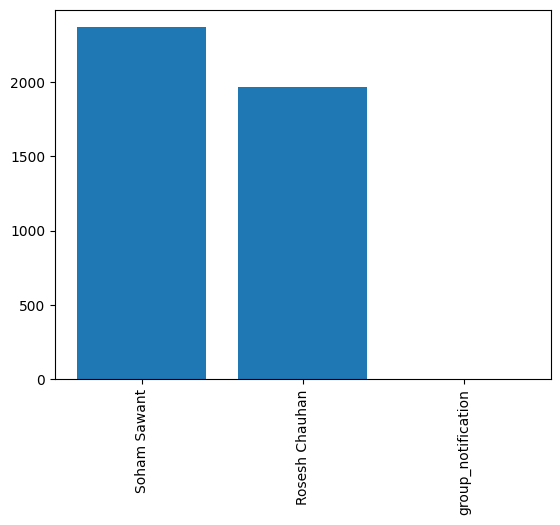

In [36]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns = {'index':'name','user':'percent'})